# Suicide Rates Overview: 1985-2016

In this project, we'll be looking at a compiled dataset, pulled from four other datasets, of global suicide rates from 1985-2016.

This dataset was downloaded from Kaggle.

## Importing Modules and CSV

To begin, we need to import the modules we'll be using during this analysis as well as the CSV file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('suicide_rate_master.csv')

## Exploring the Dataframe

In [2]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.shape

(27820, 12)

In [5]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
df.describe(include=['O'])

,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Mauritius,male,25-34 years,France1995,"1,057,801,282,051",Generation X
freq,382,13910,4642,12,12,6408


In [7]:
df.isnull().any()

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool

## Cleaning Data

There are three columns we can make changes to in order to make the data a bit cleaner and more consistent.

* year - Let's convert this into a string.
* gdp_for_year ($) - Let's change the name and remove the extra spaces. We're also going to change the type to int and remove the commas.
* HDI for year - This column contains many null values, so we're going to delete it.

In [8]:
df['year'] = df['year'].astype('str')
df['year'].dtype

dtype('O')

In [9]:
df.rename(columns={' gdp_for_year ($) ': 'gdp_per_year ($)'}, inplace = True)
df['gdp_per_year ($)'] = df['gdp_per_year ($)'].str.replace(',','').astype('int64')

In [10]:
del df['HDI for year']

In [11]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'gdp_per_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

## Overview

First, let's look at the total number of suicides per country.

In [12]:
#Total number of suicides per country

total_per_country = df.groupby('country')['suicides_no'].agg([sum]).sort_values(by='sum', ascending=False)
print(total_per_country)

                           sum
country                       
Russian Federation     1209742
United States          1034013
Japan                   806902
France                  329127
Ukraine                 319950
...                        ...
Maldives                    20
Antigua and Barbuda         11
San Marino                   4
Saint Kitts and Nevis        0
Dominica                     0

[101 rows x 1 columns]


We know this does not give us an accurate overview because we don't have the same amount of data from each country. For example, Dominica shows 0 suicides, but we can see that we only have data for Dominica from 1985.

In [13]:
df[df['country']=='Dominica']

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_per_year ($),gdp_per_capita ($),generation
7682,Dominica,1985,female,15-24 years,0,8900,0.0,Dominica1985,98585185,1485,Generation X
7683,Dominica,1985,female,25-34 years,0,5100,0.0,Dominica1985,98585185,1485,Boomers
7684,Dominica,1985,female,35-54 years,0,5400,0.0,Dominica1985,98585185,1485,Silent
7685,Dominica,1985,female,5-14 years,0,8600,0.0,Dominica1985,98585185,1485,Generation X
7686,Dominica,1985,female,55-74 years,0,3800,0.0,Dominica1985,98585185,1485,G.I. Generation
7687,Dominica,1985,female,75+ years,0,1200,0.0,Dominica1985,98585185,1485,G.I. Generation
7688,Dominica,1985,male,15-24 years,0,9500,0.0,Dominica1985,98585185,1485,Generation X
7689,Dominica,1985,male,25-34 years,0,5800,0.0,Dominica1985,98585185,1485,Boomers
7690,Dominica,1985,male,35-54 years,0,4900,0.0,Dominica1985,98585185,1485,Silent
7691,Dominica,1985,male,5-14 years,0,9300,0.0,Dominica1985,98585185,1485,Generation X


Using a count plot, we can see how much data we have per country.

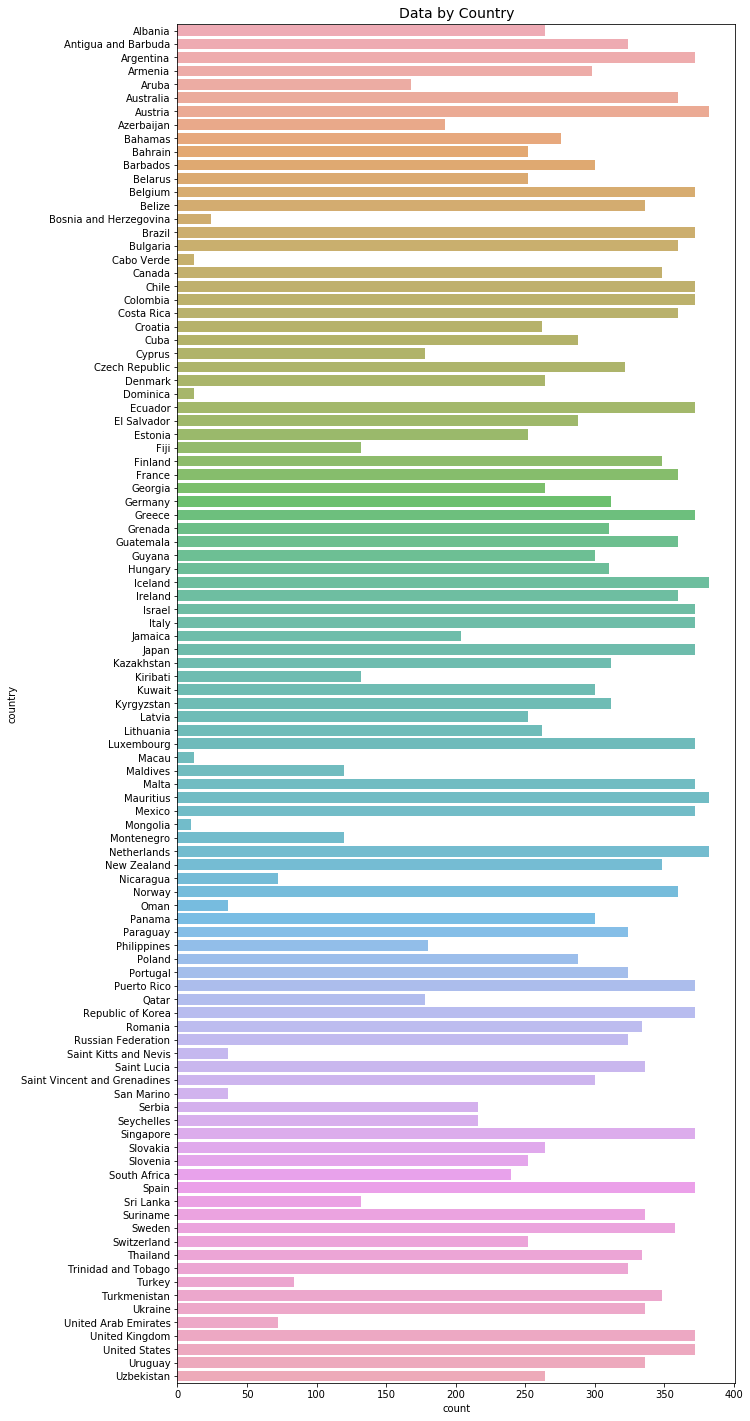

In [14]:
plt.figure(figsize=(10,25))
sns.countplot(y='country', data=df, alpha=.8)
plt.title('Data by Country', fontsize = 14)
plt.show()

And per year.

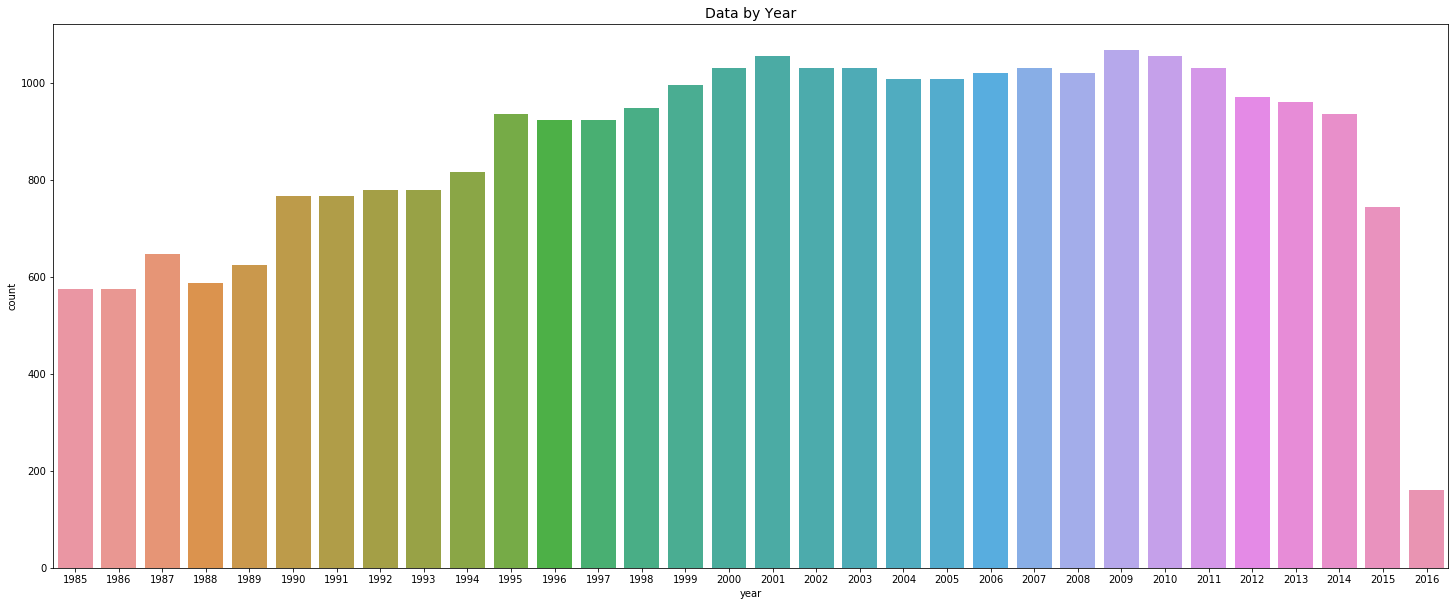

In [15]:
plt.figure(figsize=(25,10))
sns.countplot(x='year', data=df)
plt.title('Data by Year', fontsize = 14)
plt.show()

It looks like we're missing quite a lot of data for 2016.

## Analysis

### Average Suicide by Sex

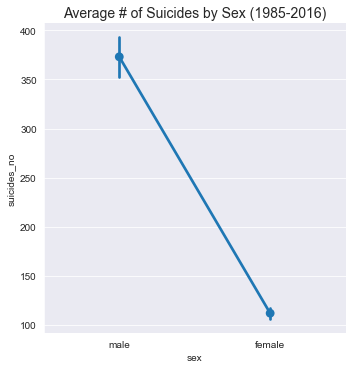

In [16]:
sns.set_style('darkgrid')
sns.catplot(x='sex', y='suicides_no', data=df, kind='point')
plt.title('Average # of Suicides by Sex (1985-2016)', fontsize=14)
plt.show()

### Average Suicide by Sex and Age Group

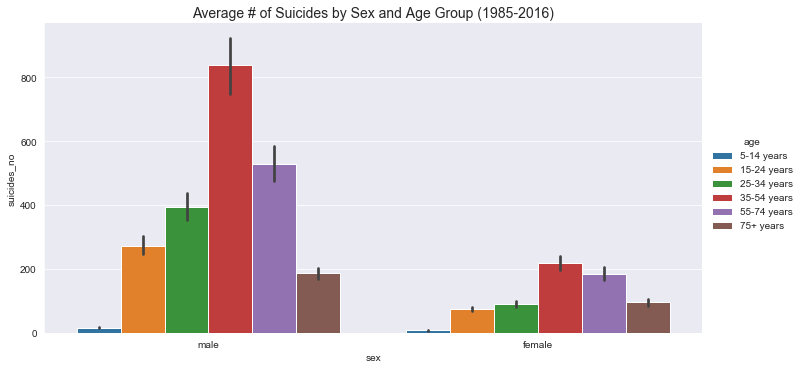

In [17]:
sns.set_style('darkgrid')
order=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
sns.catplot(x='sex', y='suicides_no', data=df, hue='age', kind='bar', hue_order=order, aspect=2)
plt.title('Average # of Suicides by Sex and Age Group (1985-2016)', fontsize=14)
plt.show()

On average, men commit suicide more often than women, and the age group with the highest average is 35-54 for both men and women.

### Number of Suicides per 100K from 1985-2015

The year 2016 does not have much data, so we won't include it in our next few visualizations.

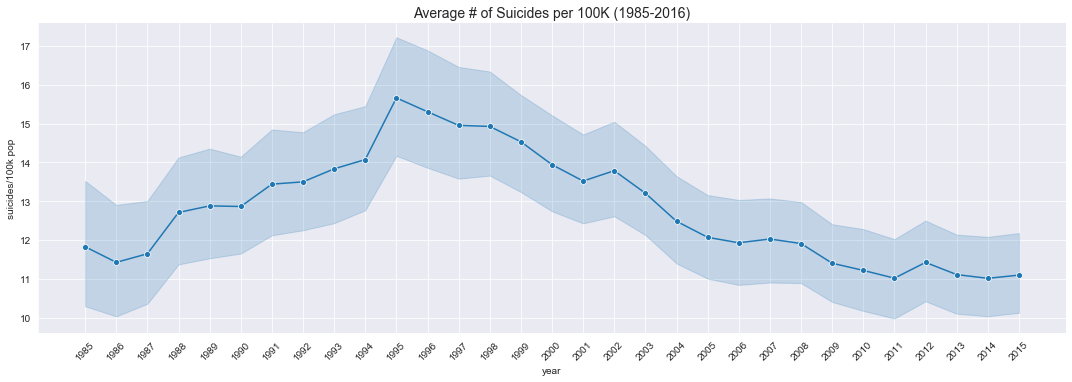

In [18]:
year_else = df[~df['year'].isin(['2016'])]

sns.set_style('darkgrid')
sns.relplot(x='year', y='suicides/100k pop', data=year_else, kind='line', marker='o', aspect=3)
plt.title('Average # of Suicides per 100K (1985-2016)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Number of Suicides per 100K by Sex from 1985-2015

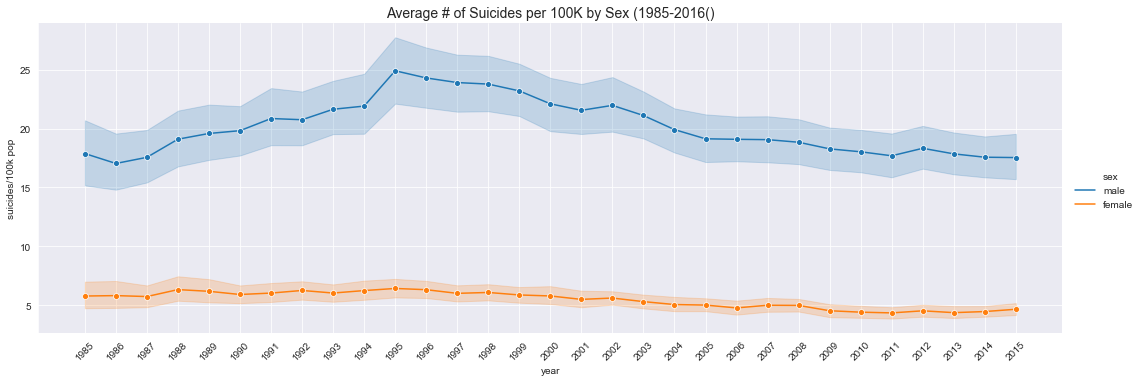

In [19]:
sns.set_style('darkgrid')
sns.relplot(x='year', y='suicides/100k pop', hue='sex', data=year_else, kind='line', marker='o', aspect=3)
plt.title('Average # of Suicides per 100K by Sex (1985-2016()', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Number of Suicides per 100K by Age from 1985-2015

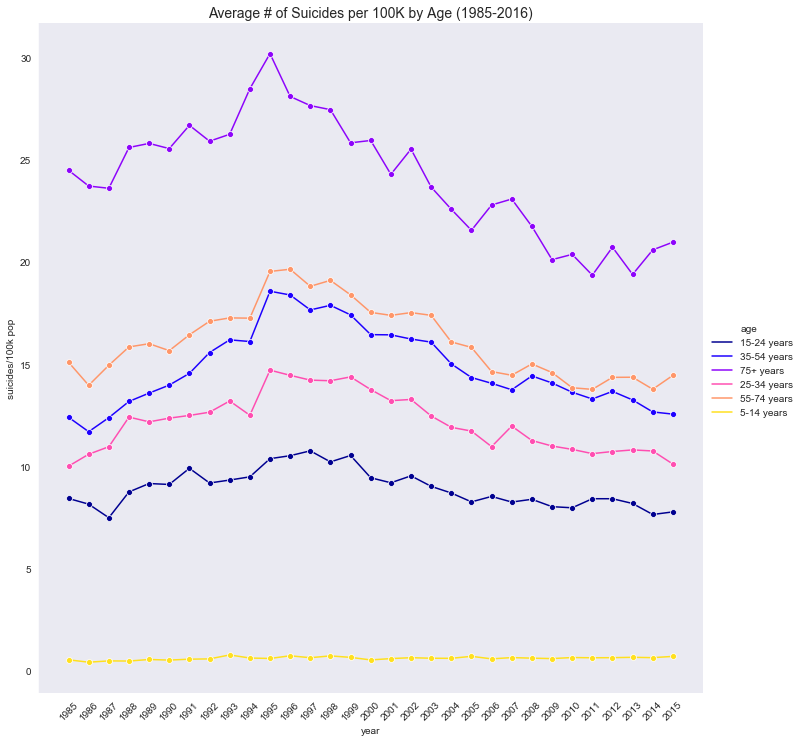

In [20]:
sns.set_style('dark')
sns.set_palette('gnuplot2')
sns.relplot(x='year', y='suicides/100k pop', hue='age', data=year_else, kind='line', marker='o', height=10, ci=None)
plt.title('Average # of Suicides per 100K by Age (1985-2016)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Suicides by GDP

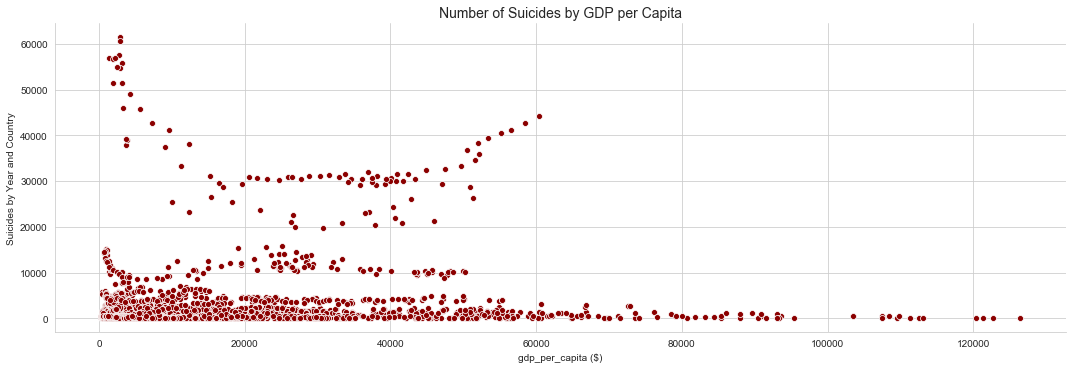

In [21]:
#Group by year and country, sum of number of suicides

df_gdp = year_else.groupby(['year','country']).agg({'suicides_no':'sum', 'gdp_per_capita ($)':'mean'})
df_gdp.reset_index(inplace=True)

sns.set_style('whitegrid')
sns.relplot(x='gdp_per_capita ($)', y='suicides_no', data=df_gdp, kind='scatter', aspect=3, color='darkred')
plt.title('Number of Suicides by GDP per Capita', fontsize=14)
plt.ylabel('Suicides by Year and Country')
plt.show()

### Top 5 Countries by Total Number of Suicides in 2015

In [31]:
year_2015 = df[df['year'].isin(['2015'])]

country_no = year_2015.groupby(by=['country']).agg({'suicides_no': 'sum'}).reset_index()
country_no.sort_values(by='suicides_no', ascending=False)

,country,suicides_no
60,United States,44189
45,Russian Federation,25432
27,Japan,23092
43,Republic of Korea,13510
7,Brazil,11163
...,...,...
6,Belize,26
48,Seychelles,7
46,Saint Vincent and Grenadines,3
0,Antigua and Barbuda,1


In 2015, the 5 countries with the largest amount of suicides were: the United States, Russian Federation, Japan, Republic of Korea, and Brazil. Let's see how these numbers have changed from 2010-2015.

In [23]:
filter1 = df['year'].isin(['2010','2011','2012','2013','2014','2015'])
filter2 = df['country'].isin(['United States','Russian Federation','Japan','Republic of Korea','Brazil'])
country_filtered = df[filter1 & filter2]

country_2010s = country_filtered.groupby(by=['country', 'year']).agg({'suicides_no': 'sum'}).reset_index()

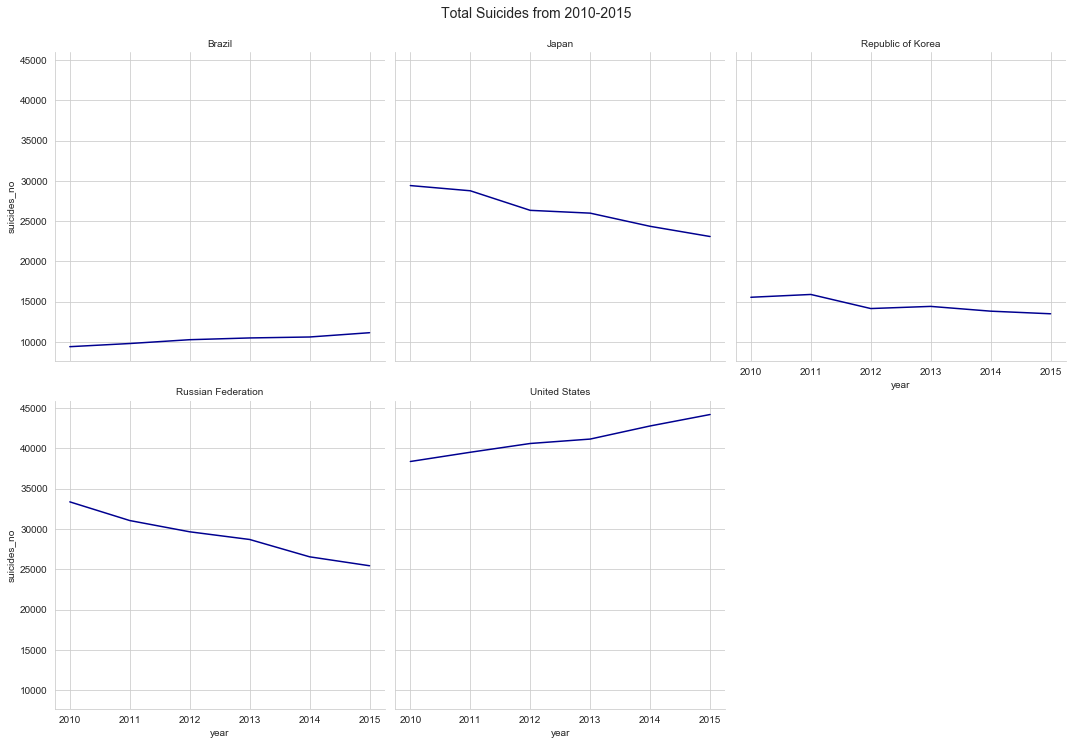

In [24]:
g=sns.relplot(x='year', y='suicides_no', data=country_2010s, col='country', col_wrap=3, kind='line')
g.fig.suptitle('Total Suicides from 2010-2015', y=1.03, fontsize=14)
g.set_titles('{col_name}')

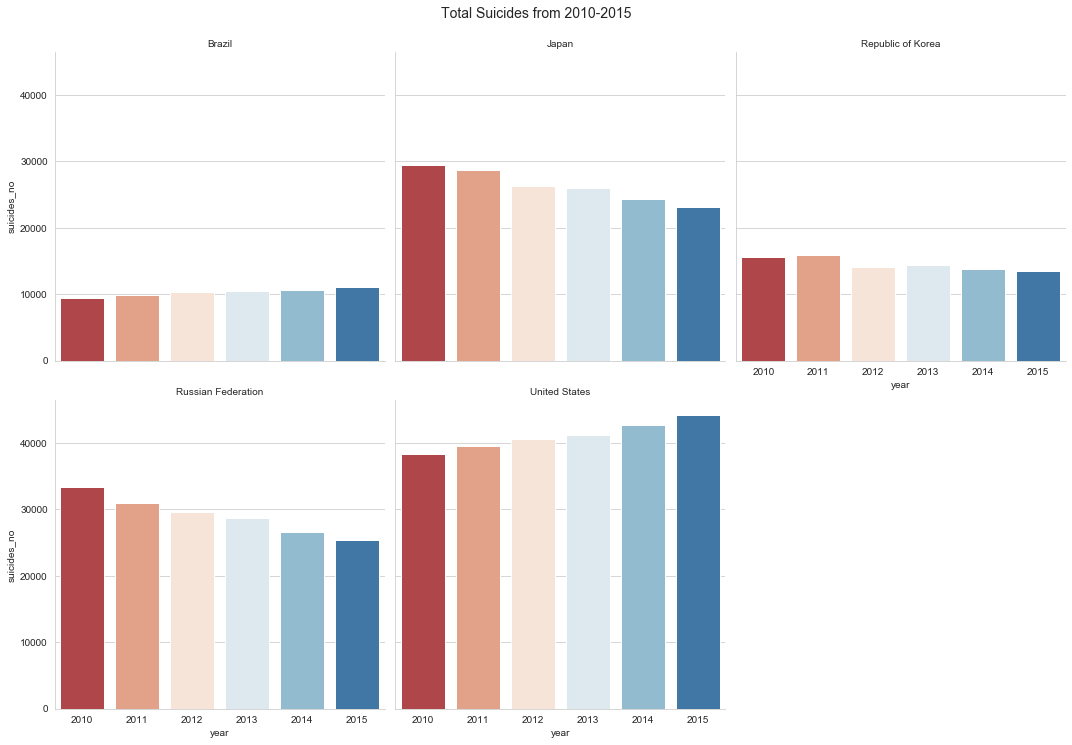

In [25]:
sns.set_palette('RdBu')
g=sns.catplot(x='year', y='suicides_no', data=country_2010s, col='country', col_wrap=3, kind='bar')
g.fig.suptitle('Total Suicides from 2010-2015', y=1.03, fontsize=14)
g.set_titles('{col_name}')

From 2010-2015, Brazil and the United States have seen increases in the number of suicides from year to year. Japan, Republic of Korea, and Russian Federation have seen a downward trend.

Let's look at the same information but subgroup by sex.

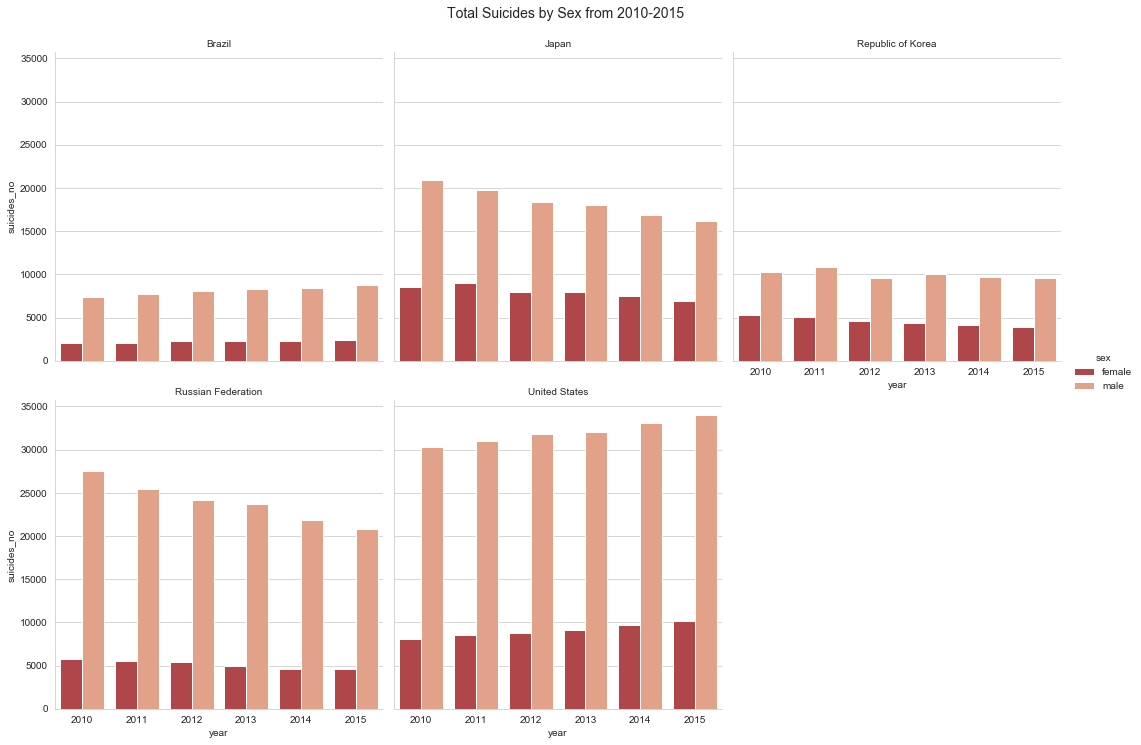

In [26]:
country_2010s = country_filtered.groupby(by=['country', 'year', 'sex']).agg({'suicides_no': 'sum'}).reset_index()

sns.set_palette('RdBu')
g=sns.catplot(x='year', y='suicides_no', data=country_2010s, hue='sex', col='country', col_wrap=3, kind='bar')
g.fig.suptitle('Total Suicides by Sex from 2010-2015', y=1.03, fontsize=14)
g.set_titles('{col_name}')

### United States

Let's look at the United States specifically.

In [27]:
united_states = df[df['country']=='United States']
united_states = united_states.groupby(by=['year']).agg({'suicides_no': 'sum'}).reset_index()


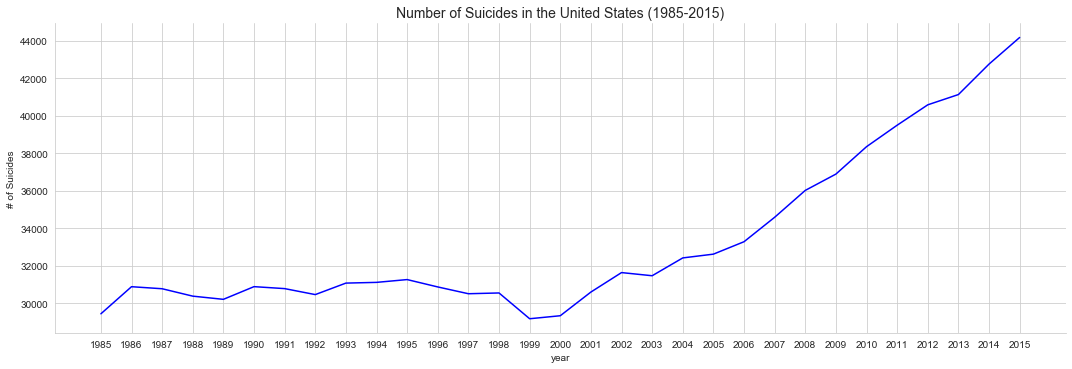

In [28]:
sns.relplot(x='year', y='suicides_no', data=united_states, kind='line', color='blue', aspect=3)
plt.title('Number of Suicides in the United States (1985-2015)', fontsize=14)
plt.ylabel('# of Suicides')
plt.show()

In [29]:
united_states = df[df['country']=='United States']
united_states = united_states.groupby(by=['year', 'sex']).agg({'suicides_no': 'sum'}).reset_index()

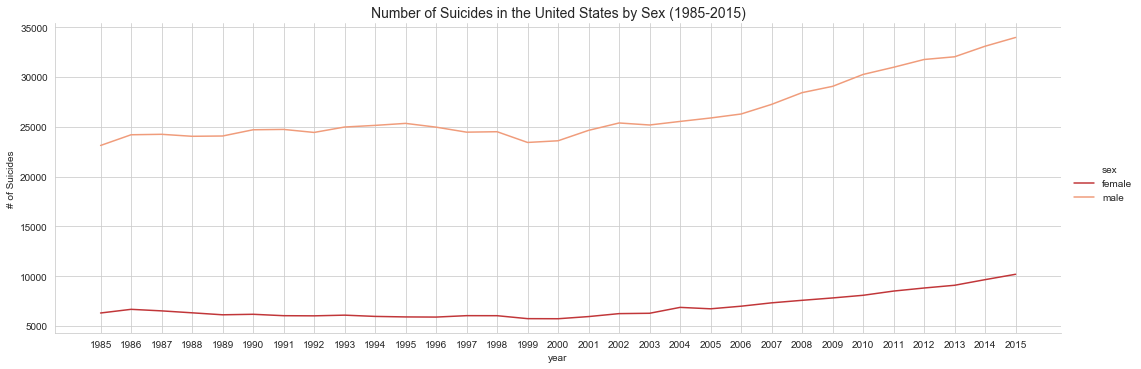

In [30]:
sns.color_palette("Set2",2)
sns.relplot(x='year', y='suicides_no', hue='sex', data=united_states, kind='line', aspect=3)
plt.title('Number of Suicides in the United States by Sex (1985-2015)', fontsize=14)
plt.ylabel('# of Suicides')
plt.show()

We can see that the number of suicides is trending upwards for both males and females, though males seem to be increasing at a higher rate.